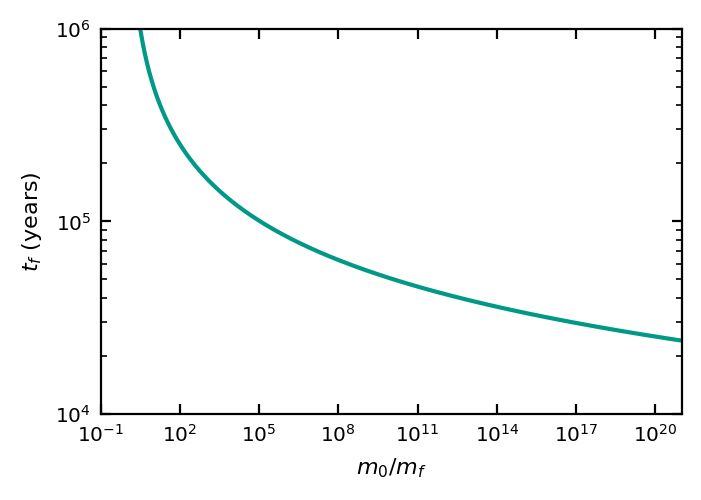

speed 53189.715266695915
23954.81896474436


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def both_ticks(fontsize):
    plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
    plt.tick_params(axis='both', which='minor', direction="in", top=True, right=True)

colours = [
    "#0077BB",  # Blue
    "#33BBEE",  # Cyan
    "#009988",  # Teal
    "#EE7733",  # Orange
    "#CC3311",  # Red
    "#EE3377",  # Magenta
]


v_exh = 4400 # check this number
seconds_year = 3.156e7
c = 2.998e8
a=9.81
light_year = c * seconds_year
x = (4.25 * light_year)

fontsize=8


def final_time(mass_ratio):
    """
    Calculate the final time (t_f) based on the given mass ratio (m_0/m_f).
    
    Parameters:
        mass_ratio (float): The ratio m_0/m_f.
    
    Returns:
        float: The calculated final time t_f.
    """
    ln_mass_ratio = np.log(mass_ratio)
    numerator = v_exh**2 * (ln_mass_ratio**2) + 16 * x * a
    denominator = 4 * a * v_exh * ln_mass_ratio
    t_f = numerator / denominator
    return t_f

v_esc=np.sqrt(2*6.67430*10**(-11) * (1.989*10**30) /0.1496e12)

plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
m0_mf = np.logspace(0.1, 100, int(1e6))
plt.plot(m0_mf, 
         final_time(m0_mf)/seconds_year,
         c= colours[2], lw=1.5,
         )
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e4,1e6)
plt.xlim(0.1,1e21)

plt.rc('text', usetex=True)  # Enable LaTeX
plt.xlabel(r"${m_{0}}/{m_{f}}$", fontsize=fontsize)
plt.ylabel("$t_f$ (years)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.vlines([1e21],1e4,3e6,"dimgrey", "dashed", lw =1)
plt.show()


print("speed", x/(final_time(1e21)))
print(final_time(1e21)/seconds_year)

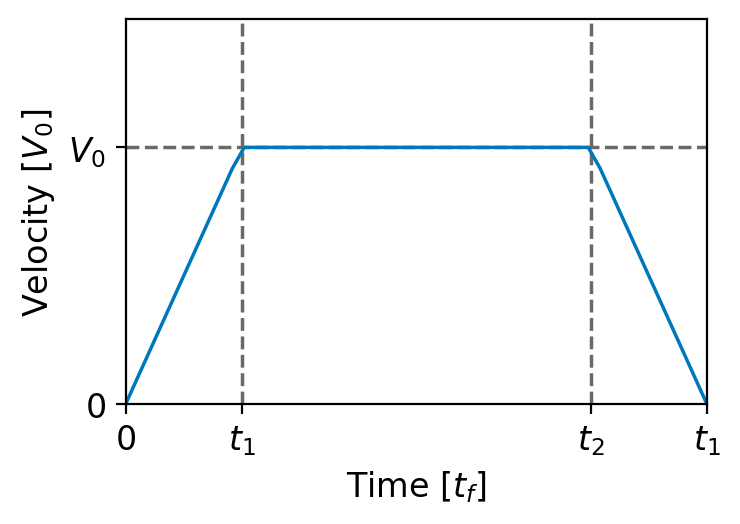

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def y(x, m):
    if x < 2000:
        return m * x
    elif x >= 2000 and x < 8000:
        return m * 2000
    elif x > 8000:
        return -m * (x - 8000) + 2000 * m

y = np.vectorize(y)

x_range = np.linspace(0, 10000)
lw = 1.25
fontsize = 12 
plt.figure(figsize=[3 * 1.25, 2 * 1.25], dpi=200)

# Plot the data
plt.vlines([0.2,0.8], 0, 1.5, "dimgrey", "dashed", lw=lw)
plt.hlines(1, 0, 1, "dimgrey", "dashed", lw=lw)
plt.plot(x_range / 10000, 
         y(x_range, 0.5) / 1000,
         c=colours[0],
         lw = lw)

# Set axis range
plt.ylim(0, 1.5)
plt.xlim(0, 1)

# Enable LaTeX for labels
plt.rc('text', usetex=True)
plt.xlabel("$\mathrm{Time } \ [t_f]$", fontsize=fontsize)
plt.ylabel("$\mathrm{Velocity } \ [V_0]$", fontsize=fontsize)
plt.rc('text', usetex=False)

# Remove default ticks and add custom ones
plt.xticks([0, 0.2, 0.8, 1], ["$0$", "$t_1$", "$t_2$", "$t_1$"], fontsize=fontsize)  

plt.yticks([0, 1], ["$0$", "$V_0$"], fontsize=fontsize)


# Display the plot
plt.show()


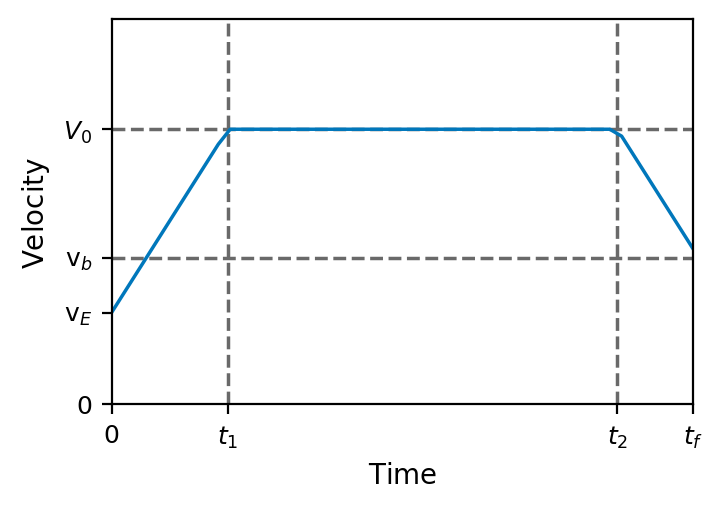

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def y(x, m, v_x,v_b):
    if x < 2000:
        return m * (x-v_x) + v_x
    elif x >= 2000-v_x and x < 8000 + v_b:
        return m * (2000+v_x)
    elif x > 8000 + v_b:
        return -m * (x - 8000 - v_b) + m * (2000+v_x)

y = np.vectorize(y)
x_samples = 10000
x_range = np.linspace(0, x_samples)
lw = 1.25
fontsize = 10
plt.figure(figsize=[3 * 1.25, 2 * 1.25], dpi=200)

m=0.5
v_x = 1000
v_b = 700
# Plot the data
plt.vlines([0.2,(8000 + v_b)/x_samples], 0, 1.5, "dimgrey", "dashed", lw=lw)
plt.hlines([1, (v_b+100)/(1000*(2*m) + v_x*m)], 0, 1, "dimgrey", "dashed", lw=lw)

plt.plot(x_range / x_samples, 
         y(x_range, m, v_x, v_b) / (1000*(2*m) + v_x*m),
         c=colours[0],
         lw = lw)

# Set axis range
plt.ylim(0, 1.4)
plt.xlim(0, 1)

# Enable LaTeX for labels
plt.rc('text', usetex=True)
plt.xlabel("$\mathrm{Time } $", fontsize=fontsize)
plt.ylabel("$\mathrm{Velocity }$", fontsize=fontsize)
plt.rc('text', usetex=False)

# Remove default ticks and add custom ones
plt.xticks([0, 0.2, (8000 + v_b)/x_samples, 1], ["$0$", "$t_1$", "$t_2$", "$t_f$"], fontsize=fontsize*0.9)  

plt.yticks([0, (v_x-500) /(1000*(2*m) + v_x*m), (v_b+100)/(1000*(2*m) + v_x*m), 1], ["$0$", "v$_E$", "v$_b$", "$V_0$"], fontsize=fontsize*0.9)


# Display the plot
plt.show()


2.6582741155304918e-08


C:\Users\morga\AppData\Local\Temp\ipykernel_137692\1331849666.py:44: RuntimeWarning: invalid value encountered in sqrt
  sqrt_term = np.sqrt(
C:\Users\morga\AppData\Local\Temp\ipykernel_137692\1331849666.py:93: RuntimeWarning: overflow encountered in exp
  plt.plot(np.exp(compute_ln_mr(t_f_range)),t_f_range/yr_sec, lw =1.25, c=colours[4])


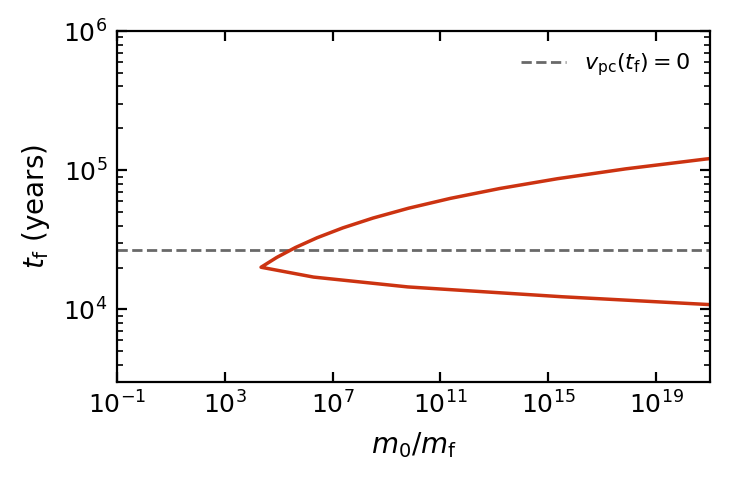

269855.88625124557
20092.33002565046


C:\Users\morga\AppData\Local\Temp\ipykernel_137692\1331849666.py:110: RuntimeWarning: overflow encountered in exp
  print(t_f_range[np.argmin(np.exp(compute_ln_mr(t_f_range)))]/yr_sec)


NameError: name 'distance' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def both_ticks(fontsize):
    plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
    plt.tick_params(axis='both', which='minor', direction="in", top=True, right=True)

colours = [
    "#0077BB",  # Blue
    "#33BBEE",  # Cyan
    "#009988",  # Teal
    "#EE7733",  # Orange
    "#CC3311",  # Red
    "#EE3377",  # Magenta
]

# Define global variables
yr_sec = 3.156e7
c = 2.998e8
a = 9.81
m = (22.4/26.7)/yr_sec
print(m)
V_b0 = 55e3
u_pc0 = -22.4e3
V_E = 38.1e3
x_0 = 4.25 * yr_sec * c
v_exh = 4.43e3
v_esc_sun = 42.1e3
v_esc_pc =65.8e3
fontsize=10
import numpy as np

def compute_ln_mr(t_f):
    """
    Compute the piecewise-defined function based on the provided Maple expression.

    Parameters:
        t_f (numpy.ndarray or float): Input time value(s). Can be a scalar or a NumPy array.

    Returns:
        numpy.ndarray or float: Computed value of ln_mr for each input.
    """
    # Precompute the square root term with vectorized operations
    sqrt_term = np.sqrt(
        a**2 * t_f**2
        - m**2 * t_f**2
        + 2 * V_E * a * t_f
        + 2 * V_E * m * t_f
        + 2 * V_b0 * a * t_f
        - 2 * V_b0 * m * t_f
        - 2 * a * t_f * u_pc0
        - 2 * m * t_f * u_pc0
        - V_E**2
        + 2 * V_E * V_b0
        + 2 * V_E * u_pc0
        - V_b0**2
        - 2 * V_b0 * u_pc0
        - 4 * a * x_0
        - u_pc0**2
    ) / 2

    # Define the core term used in the piecewise conditions
    core_term = (
        t_f * a / 2
        + m * t_f / 2
        + V_E / 2
        + V_b0 / 2
        + u_pc0 / 2
        - sqrt_term
    )

    # Piecewise evaluations using NumPy's where function
    term1 = np.where(core_term > 42100, core_term, v_esc_sun)
    term3 = np.where(core_term > 65800, core_term, v_esc_pc)

    # Combine all terms into the full expression
    result = (
        np.abs(-term1 + V_E)
        + np.abs(-term1 + m * t_f + V_b0 + u_pc0)
        + np.abs(-m * t_f - u_pc0 + V_b0 - term3)
        + np.abs(V_E - term3)
    )

    return result/v_exh

t_f_range = np.logspace(-1,6, 100)*yr_sec
fill_colour= colours[3]
fill_alpha=0.25
plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
plt.hlines([26.7e3],0.1,1e21,"dimgrey", "dashed", lw =1, label="$v_\mathrm{pc}(t_\mathrm{f})=0$")
#plt.fill_between(np.logspace(-1,21), t_f_range[indices[0]]/yr_sec,t_f_range[indices[-1]]/yr_sec, color = fill_colour, alpha=fill_alpha, lw=0)

plt.plot(np.exp(compute_ln_mr(t_f_range)),t_f_range/yr_sec, lw =1.25, c=colours[4])

plt.xscale("log")
plt.yscale("log")
plt.ylim(3e3,1e6)
plt.xlim(0.1,1e21)

plt.rc('text', usetex=True)  # Enable LaTeX
plt.xlabel(r"${m_{0}}/m_\mathrm{f}$", fontsize=fontsize)
plt.ylabel(r"$t_\mathrm{f}$ (years)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.legend(frameon=False, fontsize = fontsize*0.8)
plt.tight_layout()
plt.show()

print(np.exp(compute_ln_mr(26.7e3*yr_sec)))
print(t_f_range[np.argmin(np.exp(compute_ln_mr(t_f_range)))]/yr_sec)